Start with exploratory sweep

In [1]:
#import
from ema_workbench import Model, MultiprocessingEvaluator, Policy, Scenario

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import pairs_plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim

from ema_workbench.analysis import feature_scoring

In [2]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(4)

    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=3)

INFO | pool started with 7 workers
INFO | performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:13<00:00, 22.33it/s]
INFO | experiments finished
INFO | terminating pool


In [3]:
def get_do_nothing_dict():
    return {l.name: 0 for l in model.levers}

policies = [Policy("baseline", **get_do_nothing_dict())]


In [4]:
 with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=policies)

INFO | pool started with 7 workers
INFO | performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [00:04<00:00, 21.19it/s]
INFO | experiments finished
INFO | terminating pool


In [7]:
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Hydrological Resilience Index', 'Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,24,47.131350,1.5,0.614953,164.076969,1.5,0.947611,230.263563,10.0,0.830613,...,0,0,0,0,0,0,0,103,baseline,dikesnet
1,91,52.540085,1.0,0.187830,94.257014,1.0,0.095973,296.381174,10.0,0.395170,...,0,0,0,0,0,0,0,104,baseline,dikesnet
2,14,330.445222,1.0,0.590095,146.747804,1.0,0.704055,340.481383,10.0,0.562102,...,0,0,0,0,0,0,0,105,baseline,dikesnet
3,112,232.117342,1.5,0.458499,63.055955,10.0,0.564303,194.016660,1.5,0.779622,...,0,0,0,0,0,0,0,106,baseline,dikesnet
4,23,134.682247,1.0,0.157211,159.724041,1.5,0.194383,94.682603,10.0,0.624535,...,0,0,0,0,0,0,0,107,baseline,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,127,250.303018,1.5,0.775729,209.547556,10.0,0.442386,221.254415,1.0,0.363339,...,0,0,0,0,0,0,0,198,baseline,dikesnet
96,12,272.485615,1.5,0.821330,164.805033,1.0,0.540934,92.439233,1.5,0.329308,...,0,0,0,0,0,0,0,199,baseline,dikesnet
97,10,239.828775,10.0,0.932275,225.966179,1.0,0.728362,268.569679,1.0,0.083050,...,0,0,0,0,0,0,0,200,baseline,dikesnet
98,48,298.788975,10.0,0.711573,141.201381,10.0,0.802429,256.273035,1.5,0.975904,...,0,0,0,0,0,0,0,201,baseline,dikesnet


In [8]:
# 1. y  →  define the target behaviour
y = outcomes["Expected Annual Damage"][:,1] > 1e7       #  True = ‘bad’

# 2. X  →  pick only uncertainty columns
uncertainty_names = [u.name for u in model.uncertainties]
X = pd.DataFrame(experiments)[uncertainty_names]

# 3. PRIM
from ema_workbench.analysis import prim
prim_alg = prim.Prim(X, y, threshold=0.8)
box = prim_alg.find_box()
box.inspect()
box.show_tradeoff()

AssertionError: 

INFO | column policy dropped from analysis because it has only one category
INFO | column model dropped from analysis because it has only one category
INFO | 100 points remaining, containing 20 cases of interest
INFO | mean: 1.0, mass: 0.11, coverage: 0.55, density: 1.0 restricted_dimensions: 7


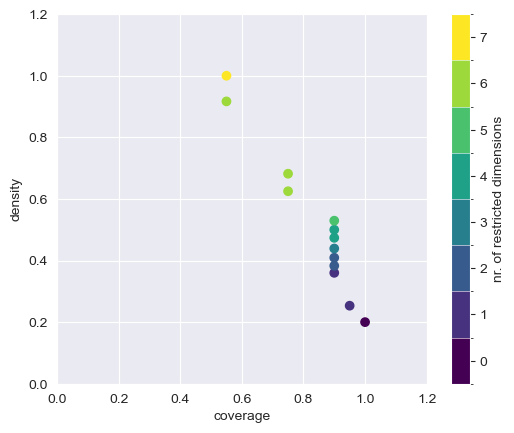

coverage     0.55
density      1.00
id          12.00
k           11.00
mass         0.11
mean         1.00
n           11.00
res_dim      7.00
Name: 12, dtype: float64

                              box 12                                 
                                 min          max  qp value  qp value
A.0_ID flood wave shape          0.0        123.0       NaN  1.000000
discount rate 1                {1.5}        {1.5}  0.000050       NaN
A.3_Brate                {10.0, 1.0}  {10.0, 1.0}  0.021680       NaN
A.5_Bmax                   53.823088   348.753509  0.383995       NaN
A.3_Bmax                   52.141148   320.341471  1.000000  0.159200
A.3_pfail                   0.015929     0.907635  1.000000  0.383995
A.2_pfail                   0.069469     0.934788  1.000000  1.000000



/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '{1.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

In [9]:
#PRIM SCENARIO 1: hoge schade in tijdstap 0
damage = outcomes["Expected Annual Damage"][:,1]

threshold = pd.Series(damage).quantile(0.8)
y_high_damage = damage > threshold

# Run PRIM
prim_alg_high = prim.Prim(experiments, y_high_damage, threshold=0.75)
box_high = prim_alg_high.find_box()

#Plot
box_high.show_tradeoff()
plt.show()

box_high.inspect()

#### Eerst even distributie van outcomes checken om een duidelijke treshold te bepalen


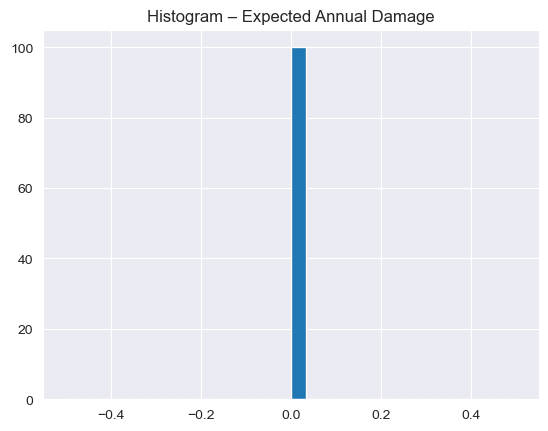

In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
damage = outcomes["RfR Total Costs"]    # 1-D (PF0–2) or 2-D (PF4)
data = damage if damage.ndim == 1 else damage[:, 1]   # pick t1
pd.Series(data).hist(bins=30)
plt.title("Histogram – Expected Annual Damage"); plt.show()


In [11]:
#### Eerst even distributie van outcomes checken om een duidelijke treshold te bepalen

import numpy as np, pandas as pd, matplotlib.pyplot as plt

HRI = outcomes["Hydrological Resilience Index"]  # 1-D (PF0–2) or 2-D (PF4)
data = HRI if HRI.ndim == 1 else HRI[0]  # pick t1
pd.Series(data).hist(bins=30)
plt.title("Histogram – Hydrological Resilience Index");
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (6, 3) instead

In [12]:
outcomes.keys()

dict_keys(['Hydrological Resilience Index', 'Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [13]:
HRI = outcomes["Hydrological Resilience Index"]   # vector or matrix

# if ndim==1  → just HRI
# else (ndim==2) → use HRI[:, 0]
data = HRI if HRI.ndim == 1 else HRI[:, 0]

pd.Series(data).hist(bins=30)
plt.title("Histogram – Hydrological Resilience Index")
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (100, 3) instead

In [31]:
model, _ = get_model_for_problem_formulation(4)
exp, out = perform_experiments(
    model,
    scenarios=1000,
    policies=[Policy("baseline", **get_do_nothing_dict())]  # minimal run
)


INFO | performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
100%|██████████████████████████████████████| 1000/1000 [03:23<00:00,  4.90it/s]
INFO | experiments finished


In [15]:
print("HRI key in outcomes:", [k for k in out.keys() if "Hydrological" in k])
print("Shape =", out["Hydrological Resilience Index"].shape)

HRI key in outcomes: ['Hydrological Resilience Index']
Shape = (1, 6, 3)


In [17]:
print("damage key in outcomes:", [k for k in out.keys() if "Damage" in k])
print("Shape =", out["Expected Annual Damage"].shape)

damage key in outcomes: ['Expected Annual Damage']
Shape = (1, 3)


In [18]:
print([k for k in out if "Damage" in k])


['Expected Annual Damage']


In [19]:
cols_unc           = [c for c in experiments.columns if "_Bmax" in c or "_Brate" in c]


In [32]:
cols_unc = [u.name for u in model.uncertainties]     # ← alle 19 onzekerheden
X = experiments[cols_unc]

In [39]:
# ---- 2.1 Hydrological Resilience Index ----
hri_sys = out["Hydrological Resilience Index"][:, -1, :].mean(axis=1)  # (N,) systeembreed
target_hri = hri_sys < 0
print(target_hri)

# ---- 2.2 Expected Annual Damage ----
ead_total = out["Expected Annual Damage"].sum(axis=1)      # (N,)
ead_q75   = np.percentile(ead_total, 75)
target_ead = ead_total >= ead_q75
print(target_ead)

# ---- 2.3 RfR Total Costs ----
rfr_costs = out["RfR Total Costs"].sum(axis=1)               # (N,)
rfr_q75   = np.percentile(rfr_costs, 75)
target_rfr = rfr_costs >= rfr_q75
print(target_rfr)

# ---- 2.4 Combineer tot één worst-case target ----
# y = target_hri | target_ead | target_rfr        # booleaanse vector (N,)
# print(f"worst-cases: {y.sum()} van 1000 runs  ({y.mean()*100:.1f} %)")

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T